# Variance decomposistion analysis

In [39]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.7-py3.8.egg')
import memento

### 

In [3]:
data_path  = '/data_volume/memento/lupus/'


ct = 'cM'
pop='eur'

print(ct)

adata = sc.read(data_path + 'single_cell/{}_{}.h5ad'.format(pop, ct))

cM


In [4]:
adata.obs['ind_cov'].value_counts()

1545_1545    3808
1078_1078    3124
2135_2135    2835
1225_1225    2785
1132_1132    2694
             ... 
HC-508        421
HC-008        395
1315_1315     353
HC-512        327
1493_1493     313
Name: ind_cov, Length: 91, dtype: int64

In [5]:
adata = adata[adata.obs['ind_cov'] == '1545_1545'].copy()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [11]:


adata.obs['capture_rate'] = 0.1
memento.setup_memento(adata, q_column='capture_rate', trim_percent=0.1, filter_mean_thresh=0.07)
# 		adata.obs['memento_size_factor'] = 1.0
memento.create_groups(adata, label_columns=['ind_cov'])

treatment_df = pd.DataFrame()
treatment_df.index= [x[3:] for x in adata.uns['memento']['groups']]
treatment_df['treatment'] = 1


memento.compute_1d_moments(adata, min_perc_group=.2)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [12]:
memento.ht_1d_moments(
    adata, 
    formula_like='1',
    treatment_col='Inter', 
    num_boot=5000, 
    verbose=1,
    num_cpus=10,
    resampling='bootstrap',
    approx=True)

     ind_cov
0  1545_1545


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 300 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1160 tasks      | elapsed:    9.0s
[Parallel(n_jobs=10)]: Done 2560 tasks      | elapsed:   16.8s
[Parallel(n_jobs=10)]: Done 3061 out of 3061 | elapsed:   19.9s finished


In [14]:
res = memento.get_1d_ht_result(adata)

In [24]:
np.log(adata.uns['memento']['1d_moments']['sg^1545_1545'][1])

array([-0.51671153, -4.5543876 , -4.6642675 , ..., -4.149714  ,
        2.239568  , -3.3282733 ], dtype=float32)

Text(0, 0.5, 'Standard error')

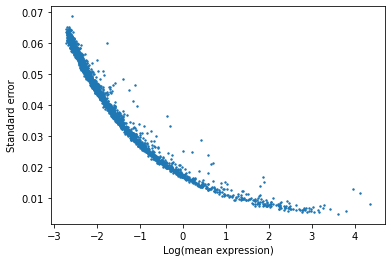

In [35]:
plt.scatter(res['de_coef'], res['de_se'], s=2)
plt.xlabel('Log(mean expression)')
plt.ylabel('Standard error')

Text(0, 0.5, 'Standard error')

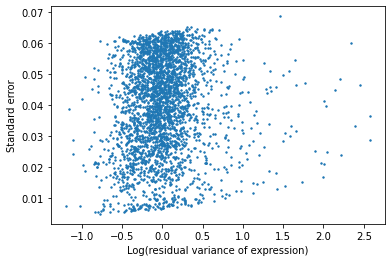

In [37]:
plt.scatter(
    res['dv_coef'], res['de_se'], 
    s=2)
plt.xlabel('Log(residual variance of expression)')
plt.ylabel('Standard error')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dv_coef', ylabel='de_se'>

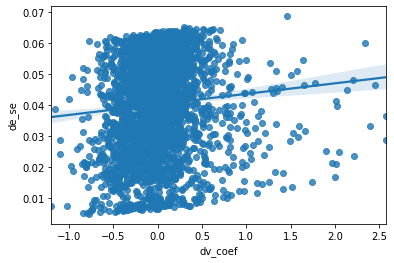

In [41]:
sns.regplot(res['dv_coef'], res['de_se'])

In [40]:
stats.pearsonr(res['dv_coef'], res['de_se'])

(0.0851963934117846, 2.3554307786609923e-06)

Text(0, 0.5, 'Standard error')

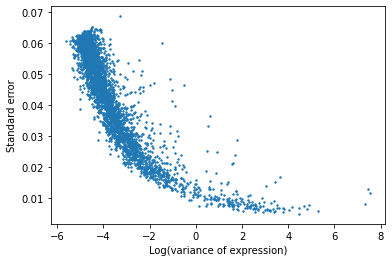

In [36]:
plt.scatter(
    np.log(adata.uns['memento']['1d_moments']['sg^1545_1545'][1]), res['de_se'], 
    s=2)
plt.xlabel('Log(variance of expression)')
plt.ylabel('Standard error')